# Robotics, Vision & Control 3e: for Python
## Chapter 5: Navigation

Copyright (c) 2021- Peter Corke

In [5]:
try:
    import google.colab
    print('Running on CoLab')
    #!pip install roboticstoolbox-python>=1.0.2
    !pip install git+https://github.com/petercorke/robotics-toolbox-python@future
    !pip install spatialmath-python>=1.1.5
    !pip install bdsim
    !pip install --no-deps rvc3python
    COLAB = True
except ModuleNotFoundError:
    COLAB = False

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr_or_assign"
from IPython.display import HTML

import matplotlib.pyplot as plt

# add RTB examples folder to the path
import sys, os.path
import RVC3 as rvc
sys.path.append(os.path.join(rvc.__path__[0], 'models'))

# helper function to run bdsim in a subprocess and transfer results using a pickle file
import pickle
def run_shell(tool, **params):
    global out
    pyfile = os.path.join(rvc.__path__[0], "models", tool+".py")
    cmd = f"python {pyfile} -H +a -o"
    for key, value in params.items():
        cmd += f' --global "{key}={value}"'
    print(cmd)
    os.system(cmd)
    with open("bd.out", "rb") as f:
        out = pickle.load(f)

# ------ standard imports ------ #
import numpy as np
import math
from math import pi
np.set_printoptions(
    linewidth=120, formatter={
        'float': lambda x: f"{0:8.4g}" if abs(x) < 1e-10 else f"{x:8.4g}"})
np.random.seed(0)
from spatialmath import *
from spatialmath.base import *
from roboticstoolbox import *


Running on CoLab
  Cloning https://github.com/petercorke/robotics-toolbox-python (to revision future) to /tmp/pip-req-build-8qmyso1s
  Running command git clone --filter=blob:none --quiet https://github.com/petercorke/robotics-toolbox-python /tmp/pip-req-build-8qmyso1s
  Running command git checkout -b future --track origin/future
  Switched to a new branch 'future'
  Branch 'future' set up to track remote branch 'future' from 'origin'.
  Resolved https://github.com/petercorke/robotics-toolbox-python to commit 6188446a943f6c4d830b4d79b0a36b45cd3e7084
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


# 5.1 Introduction to Reactive Navigation


## 5.1.1 Braitenberg Vehicles


In [ ]:
def sensorfield(x, y):
  xc, yc = (60, 90)
  return 200 / ((x - xc) ** 2 + (y - yc) ** 2 + 200)

<div style="background-color:red">
<span style="background-color:red; font-size:20pt">NOTE</span>

There are issues in running bdsim from inside Jupyter.  We have two options, disable all graphics (which is a bit dull) or run bdsim from a subprocess with its own popout windows.

For Colab we can only do the first option.  

Otherwise, we use the wrapper function `run_shell()` defined in the first cell to spawn a new Python instance to run the block diagram which will pop up new windows on your screen to display a simple animation showing the vehicle's motion in the plane.  This makes it a bit harder to get parameters and data between Jupyter and the `bdsim` simulation, so:
* parameter values are passed to `bdsim` as `--global` command line options.
* the `-o` command line option to `bdsim` causes it to write results as a pickle file, which are then imported back into Jupyter.</div>

attempt to programmatically set option animation=True is overriden by command line option animation=False, ignored
attempt to programmatically set option graphics=True is overriden by command line option graphics=False, ignored
* Creates Fig 5.4
* Robotics, Vision & Control for Python, P. Corke, Springer 2023.
* Copyright (c) 2021- Peter Corke

Compiling:
┌───────────────┬─────────────┬────────┬─────────────┬─────────────────────┐
│     block     │    type     │ inport │   source    │     source type     │
├───────────────┼─────────────┼────────┼─────────────┼─────────────────────┤
│ Ks            │ gain        │ 0      │ sum.1       │ float64             │
├───────────────┼─────────────┼────────┼─────────────┼─────────────────────┤
│ Kv            │ gain        │ 0      │ sum.0       │ float64             │
├───────────────┼─────────────┼────────┼─────────────┼─────────────────────┤
│ leftsensor    │ function    │ 0      │ vehicle     │ ndarray(3,).float64 │
├───────────────┼─────────

/usr/local/lib/python3.11/dist-packages/RVC3/models/braitenberg.py:30: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  ax.figure.colorbar(a)



<<< Simulation complete
  block diagram evaluations: 3758
  block diagram exec time:   0.263 ms
  time steps:                626
  integration intervals:     1



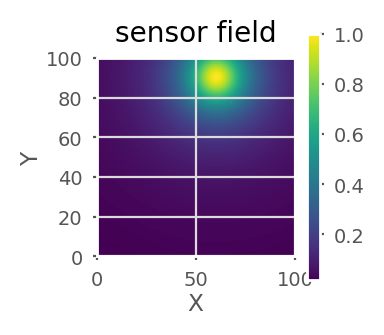

In [6]:
if COLAB:
  %run -m braitenberg -H -g  # no graphics
else:
  run_shell("braitenberg")

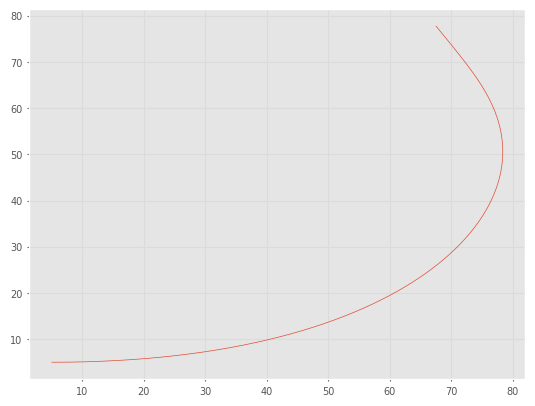

In [7]:
plt.plot(out.x[:,0], out.x[:,1]);

## 5.1.2 Simple Automata


In [8]:
house = rtb_load_matfile("data/house.mat");

In [9]:
floorplan = house["floorplan"];
floorplan.shape

(397, 596)

In [10]:
places = house["places"];
places.keys()

dict_keys(['kitchen', 'garage', 'br1', 'br2', 'br3', 'nook', 'mudroom', 'patio', 'study', 'garden', 'driveway', 'living'])

In [13]:
places.br1

array([ 50, 220], dtype=uint8)

In [14]:
bug = Bug2(occgrid=floorplan);

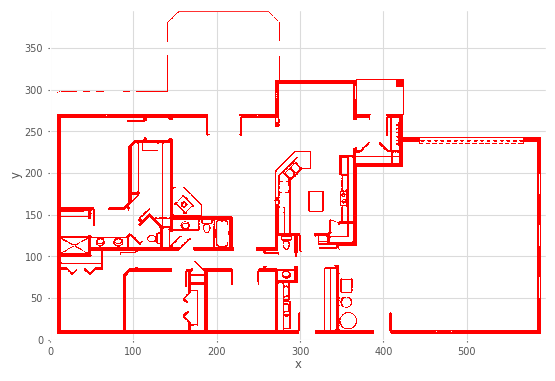

In [15]:
bug.plot();

(1307, 2)

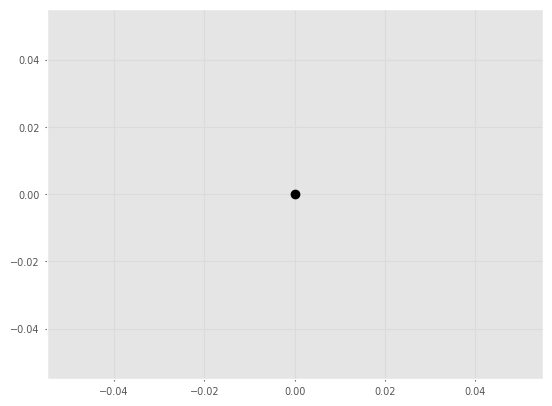

In [16]:
# bug.run(start=places.br3, goal=places.kitchen, animate=True);  # wont work in Jupyter

path = bug.run(start=places.br3, goal=places.kitchen);  # compute the path
path.shape

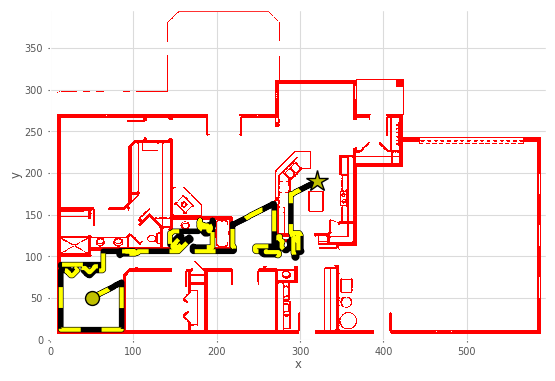

In [17]:
bug.plot(path);  # then overlay it on the map

# 5.2 Introduction to Map-Based Navigation


# 5.3 Planning with a Graph-Based Map


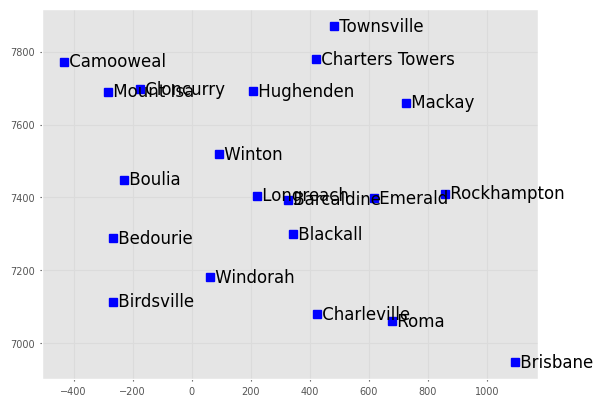

In [24]:
data = rtb_load_jsonfile("data/queensland.json"); #Carga de datos y visualización de lugares
for name, info in data["places"].items():
  plot_point(info["utm"], text=name)

In [25]:
data["routes"][1] #Visualización de rutas

{'start': 'Mount Isa', 'end': 'Cloncurry', 'distance': 118, 'speed': 100}

In [26]:
import pgraph #Creación del grafo
g = pgraph.UGraph()  # Crear un grafo no dirigido
for name, info in data["places"].items():
  g.add_vertex(name=name, coord=info["utm"])  # # Añadir vértices al grafo
for route in data["routes"]:
  g.add_edge(route["start"], route["end"],
             cost=route["distance"])  #  Añadir aristas al grafo

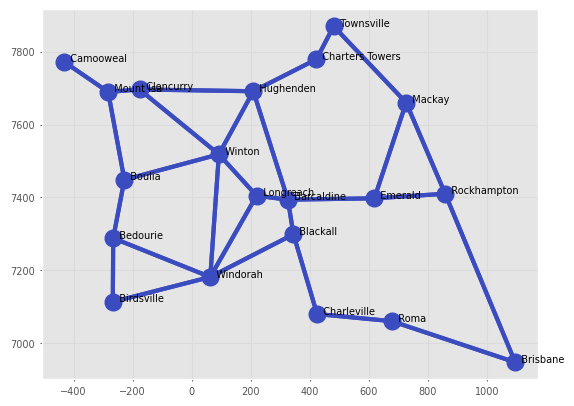

In [27]:
g.plot()

In [29]:
g.n # nodos


20

In [30]:
g.ne # aristas

29

In [31]:
g["Brisbane"] # lugar especifico

UVertex[Brisbane, coord=(1096, 6947)]

In [32]:
g["Brisbane"].neighbors()  #Devuelve los nodos vecinos conectados directamente al nodo

[UVertex[Rockhampton, coord=(858.9, 7410)], UVertex[Roma, coord=(677.7, 7060)]]

In [33]:
g["Brisbane"].degree #úmero de conexiones directas (aristas) que tiene

2

In [34]:
g.average_degree() #grado promedio de todos los nodos del grafo

2.9

In [35]:
g.nc #ndica si el grafo está completamente conectado

1

Permite inspeccionar las rutas disponibles desde un nodo específico, incluyendo información sobre los nodos extremos de cada ruta.


In [39]:
edges = g["Brisbane"].edges()

[Edge{[Rockhampton] -- [Brisbane], cost=682},
 Edge{[Brisbane] -- [Roma], cost=482}]

In [42]:
edges[0].endpoints

[UVertex[Rockhampton, coord=(858.9, 7410)],
 UVertex[Brisbane, coord=(1096, 6947)]]

planificación de ruta

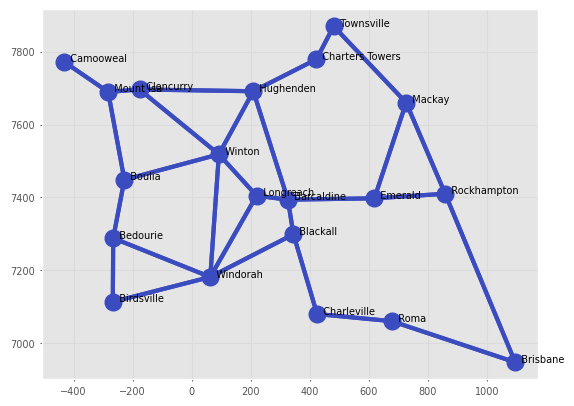

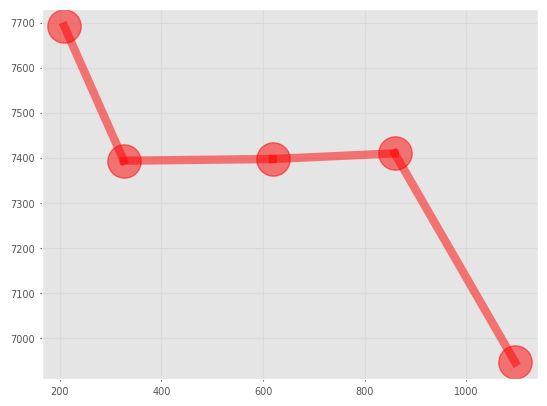

In [44]:
path, length = g.path_BFS("Hughenden", "Brisbane") #Encuentra un camino entre los nodos Hughenden y Brisbane utilizando el algoritmo de búsqueda en anchura (BFS).
length
", ".join([p.name for p in path])
ax = g.plot(block=None)
g.highlight_path(path)


Búsqueda de la ruta más corta utilizando UCS

In [45]:
path, length, parents = g.path_UCS("Hughenden", "Brisbane")
length
", ".join([p.name for p in path])

'Hughenden, Barcaldine, Blackall, Charleville, Roma, Brisbane'

In [48]:
parents["Townsville"] # será el nodo desde el cual se alcanzó ese menor costo( el nodo mas cercano)
#Son esenciales para representar el árbol de búsqueda generado por UCS, te permiten almacenar y rastrear las decisiones óptimas durante la búsqueda

'Charters Towers'

In [49]:
tree = pgraph.DGraph.Dict(parents);  #Convierte el diccionario de padres en un grafo dirigido

In [50]:
tree.showgraph() #Proporciona una representación visual del árbol de búsqueda, mostrando cómo se exploraron los nodos y se formó el camino óptimo

In [51]:
g.path_UCS("Hughenden", "Brisbane", verbose=True) #ara calcular el camino más corto entre los nodos "Hughenden" y "Brisbane" en el grafo g


FRONTIER: Hughenden(0)
EXPLORED: 
   expand Hughenden
      add Cloncurry to the frontier
      add Charters Towers to the frontier
      add Barcaldine to the frontier
      add Winton to the frontier
     move Hughenden to the explored list

FRONTIER: Cloncurry(401), Charters Towers(248), Barcaldine(500), Winton(216)
EXPLORED: Hughenden
   expand Winton
      add Longreach to the frontier
      add Boulia to the frontier
      add Windorah to the frontier
     move Winton to the explored list

FRONTIER: Cloncurry(401), Charters Towers(248), Barcaldine(500), Longreach(396), Boulia(579), Windorah(703)
EXPLORED: Hughenden, Winton
   expand Charters Towers
      add Townsville to the frontier
     move Charters Towers to the explored list

FRONTIER: Cloncurry(401), Barcaldine(500), Longreach(396), Boulia(579), Windorah(703), Townsville(383)
EXPLORED: Hughenden, Winton, Charters Towers
   expand Townsville
      add Mackay to the frontier
     move Townsville to the explored list

FRONTI

([UVertex[Hughenden, coord=(208.6, 7692)],
  UVertex[Barcaldine, coord=(325.8, 7394)],
  UVertex[Blackall, coord=(344.5, 7299)],
  UVertex[Charleville, coord=(424.7, 7080)],
  UVertex[Roma, coord=(677.7, 7060)],
  UVertex[Brisbane, coord=(1096, 6947)]],
 1659,
 {'Cloncurry': 'Hughenden',
  'Charters Towers': 'Hughenden',
  'Barcaldine': 'Hughenden',
  'Winton': 'Hughenden',
  'Longreach': 'Winton',
  'Boulia': 'Winton',
  'Windorah': 'Winton',
  'Townsville': 'Charters Towers',
  'Mackay': 'Townsville',
  'Mount Isa': 'Cloncurry',
  'Blackall': 'Barcaldine',
  'Emerald': 'Barcaldine',
  'Camooweal': 'Mount Isa',
  'Bedourie': 'Boulia',
  'Charleville': 'Blackall',
  'Birdsville': 'Bedourie',
  'Rockhampton': 'Emerald',
  'Roma': 'Charleville',
  'Brisbane': 'Roma'})

In [ ]:
g["Bedourie"].edgeto(g["Birdsville"]).cost

In [ ]:
path, length, parents = g.path_Astar("Hughenden", "Brisbane", summary=True)
length
", ".join([p.name for p in path])

In [ ]:
# find the unique vertex names
visited = set(list(parents.keys()) + list(parents.values()));
plt.clf()
g.plot(block=None)
# g.highlight_vertex(visited, color="yellow")

In [ ]:
g.path_Astar("Hughenden", "Brisbane", verbose=True)

## 5.3.1 Minimum-Time Path Planning


In [ ]:
g = pgraph.UGraph()
for name, info in data["places"].items():
  g.add_vertex(name=name, coord=info["utm"])
for route in data["routes"]:
  g.add_edge(route["start"], route["end"],
             cost=route["distance"] / route["speed"])

In [ ]:
g.heuristic = lambda x: np.linalg.norm(x) / 100

In [ ]:
path, time, _ = g.path_Astar("Hughenden", "Brisbane")
time
", ".join([p.name for p in path])

# 5.4 Planning with an Occupancy-Grid Map


## 5.4.1 Distance Transform


In [ ]:
map = np.zeros((100, 100));

In [ ]:
map[40:50, 20:80] = 1;  # set to occupied

In [ ]:
map.ravel()[np.random.choice(map.size, 100, replace=False)] = 1;

In [ ]:
simplegrid = np.zeros((6, 6));
simplegrid[2:5, 3:5] = 1
simplegrid[3:5, 2] = 1

In [ ]:
dx = DistanceTransformPlanner(occgrid=simplegrid);

In [ ]:
dx.plan(goal=(1, 1))

In [ ]:
dx.plot(labelvalues=True);

In [ ]:
dx = DistanceTransformPlanner(occgrid=simplegrid, distance="manhattan");
dx.plan(goal=(1, 1))
dx.plot(labelvalues=True);

In [ ]:
dx.plot_3d();

In [ ]:
path = dx.query(start=(5, 4))

In [ ]:
dx.plot(path);

In [ ]:
# dx.query(start=(5, 4), animate=True);
# won't work in Jupyter

In [ ]:
house = rtb_load_matfile("data/house.mat");
floorplan = house["floorplan"];
places = house["places"];

In [ ]:
dx = DistanceTransformPlanner(occgrid=floorplan);
dx.plan(goal=places.kitchen)
dx.plot();

In [ ]:
path = dx.query(start=places.br3);
path.shape

In [ ]:
dx.plot(path);

In [ ]:
dx.plan(places.kitchen, summary=True);

In [ ]:
# dx.plan(places.kitchen, animate=True);
# won't work in Jupyter

In [ ]:
dx = DistanceTransformPlanner(occgrid=floorplan, inflate=5);
dx.plan(places.kitchen);
p = dx.query(places.br3);
dx.plot(p);

## 5.4.2 D*


In [ ]:
dstar = DstarPlanner(occgrid=floorplan);

In [ ]:
c = dstar.costmap;

In [ ]:
dstar.plan(goal=places.kitchen);

In [ ]:
nexpand0 = dstar.nexpand

In [ ]:
path = dstar.query(start=places.br3);

In [ ]:
def sensorfunc(pos):
   if pos[0] == 300:  # near the door?
       changes = []
       for x in range(300, 325):
           for y in range(115,125):
               changes.append((x, y, np.inf))
       return changes

In [ ]:
dstar.query(start=places.br3, sensor=sensorfunc);

In [ ]:
dstar.nexpand - nexpand0

# 5.5 Planning with Roadmaps


In [ ]:
occgrid = floorplan.copy();

In [ ]:
occgrid[0, :] = 1
occgrid[-1, :] = 1
occgrid[:, 0] = 1
occgrid[:, -1] = 1

In [ ]:
from machinevisiontoolbox import Image

freespace = Image(occgrid == 0)
freespace.disp();

In [ ]:
skeleton = freespace.thin().disp();

### Excurse 5.8: Voronoi Tessellation

In [ ]:
sites = np.random.uniform(size=(2,9));
from scipy.spatial import Voronoi

vor = Voronoi(sites.T);

from scipy.spatial import voronoi_plot_2d

ax = plt.gca()
ax.plot(sites[0,:], sites[1,:], "k*", markersize=10)
voronoi_plot_2d(vor, ax=ax, show_points=False)
ax.set_aspect('equal')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)


In [ ]:
prm = PRMPlanner(occgrid=floorplan, seed=0);

In [ ]:
prm.plan(npoints=50)

In [ ]:
prm

In [ ]:
prm.plot();

In [ ]:
prm.plan(npoints=300)
prm.plot();
prm

In [ ]:
np.random.rand(5)  # seeded by NumPy (not repeatable)
np.random.seed(42)
np.random.rand(5)  # with seed of 42
np.random.seed(42)
np.random.rand(5)  # with seed of 42

In [ ]:
path = prm.query(start=places.br3, goal=places.kitchen);
prm.plot(path)

In [ ]:
path = prm.query(start=places.br2, goal=places.kitchen);
path.shape

# 5.6 Planning Driveable Paths


In [ ]:
qs = (0, 0, pi/2);
qg = (1, 0, pi/2);

## 5.6.1 Dubins Path Planner


In [ ]:
dubins = DubinsPlanner(curvature=1)

In [ ]:
path, status = dubins.query(qs, qg)
path.shape

In [ ]:
dubins.plot(path);

In [ ]:
status

In [ ]:
dubins.plot(path, configspace=True);

## 5.6.2 Reeds-Shepp Path Planner


In [ ]:
rs = ReedsSheppPlanner(curvature=1)
path, status = rs.query(qs, qg)
path.shape
status

In [ ]:
rs.plot(path, direction=status.direction);

In [ ]:
rs.plot(path, configspace=True);

## 5.6.3 Lattice Planner


In [ ]:
lp = LatticePlanner();
lp.plan(iterations=1, summary=True)
lp.plot()

In [ ]:
lp.plan(iterations=2, summary=True)
lp.plot()

In [ ]:
lp.plot(configspace=True)

In [ ]:
lp.plan(iterations=8, summary=True)
lp.plot()

In [ ]:
path, status = lp.query(qs, qg);
path.shape

In [ ]:
lp.plot(path)

In [ ]:
status

In [ ]:
lattice = LatticePlanner(costs=[1, 10, 1])  # S, L, R
lp.plan(iterations=8)
path, status = lp.query(qs, qg)

In [ ]:
og = BinaryOccupancyGrid(workspace=[-5, 5, -5, 5], value=False)

In [ ]:
og.set([-2, 0, -2, -1], True)
og.set([2, 3, 0, 4], True)
og.set([0, 2, -2, -2], True)

In [ ]:
lattice = LatticePlanner(occgrid=og)
lattice.plan(iterations=None)

In [ ]:
path, status = lattice.query(qs, qg)
lattice.plot(path)

## 5.6.4 Curvature Polynomials


In [ ]:
cpoly = CurvaturePolyPlanner()
path, status = cpoly.query(qs, qg)
status
cpoly.plot(path);

## 5.6.5 Planning in Configuration Space


In [ ]:
map = PolygonMap(workspace=[0, 10]);
map.add([(5, 50), (5, 6), (6, 6), (6, 50)])
map.add([(5, 4), (5, -50), (6, -50), (6, 4)])

In [ ]:
map.plot()

qs = (2, 8, -pi/2);
qg = (8, 2, -pi/2);

piano = VehicleIcon("piano", scale=3)
piano.plot(qs);
piano.plot(qg);

In [ ]:
l, w = 3, 1.5;
vpolygon = Polygon2([(-l/2, w/2), (-l/2, -w/2),
                     (l/2, -w/2), (l/2, w/2)]);

In [ ]:
q = (2, 4, 0);

In [ ]:
map.iscollision(vpolygon.transformed(SE2(q)))

In [ ]:
vehicle = Bicycle(steer_max=1, L=2, polygon=vpolygon);

In [ ]:
vehicle.curvature_max

In [ ]:
rrt = RRTPlanner(map=map, vehicle=vehicle, npoints=50, showsamples=True, seed=0)

In [ ]:
q = rrt.qrandom()
rrt.iscollision(q)

In [ ]:
# rrt.plan(goal=qg, animate=True)
rrt.plan(goal=qg, animate=False)

In [ ]:
path, status = rrt.query(start=qs);

In [ ]:
rrt.g.plot()

In [ ]:
rrt.g.highlight_path(status.vertices, color="red")

In [ ]:
rrt.plot(path);

In [ ]:
status.initial_d

# 5.7 Advanced Topics


## 5.7.3 Converting between Graphs and Matrices


In [ ]:
import pgraph
g = pgraph.UGraph()
for i in range(4):  # add 4 vertices
  g.add_vertex()
g[0].connect(g[1], cost=1);  # 0 -- 1
g[0].connect(g[3], cost=2);  # 0 -- 3
g[1].connect(g[2], cost=3);  # 1 -- 2
g.distance()